In [6]:
import pandas as pd
import numpy as np

In [8]:
earthquake_data = pd.read_csv("earthquake-data-turkey.txt")
df = earthquake_data.copy()
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-12-28T09:34:06.950Z,38.1995,38.0744,10.000,4.6,mb,73.0,30.0,0.961,0.93,...,2024-03-02T21:39:32.040Z,"17 km SSE of Akçadağ, Turkey",earthquake,4.54,1.769,0.103,28.0,reviewed,us,us
1,2023-12-27T13:04:12.459Z,41.0715,33.7513,10.000,4.9,mb,114.0,34.0,0.908,0.43,...,2024-03-02T21:39:32.040Z,"19 km NNE of Ilgaz, Turkey",earthquake,2.38,1.848,0.064,78.0,reviewed,us,us
2,2023-12-14T22:32:58.929Z,36.1922,36.0589,10.000,4.6,mb,33.0,56.0,1.346,0.62,...,2024-02-17T22:43:10.040Z,"2 km SSW of Toygarlı, Turkey",earthquake,5.59,1.934,0.243,5.0,reviewed,us,us
3,2023-12-04T07:42:20.496Z,40.4371,28.8480,10.117,5.1,mww,104.0,32.0,1.306,0.63,...,2024-02-10T23:47:29.040Z,"7 km NNW of Mudanya, Turkey",earthquake,4.14,3.646,0.071,19.0,reviewed,us,us
4,2023-12-01T00:18:50.121Z,38.3501,37.6095,10.000,4.5,mwr,35.0,47.0,0.934,0.39,...,2024-02-06T21:53:55.040Z,"23 km SSE of Darende, Turkey",earthquake,1.58,1.803,0.061,26.0,reviewed,us,us


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,2185.0,38.365420,1.615776,35.462,36.9992,38.3970,39.4400,42.356
longitude,2185.0,34.028978,6.408459,25.140,27.9485,32.2280,40.0620,45.085
depth,2185.0,21.903271,26.269550,0.000,10.0000,13.0320,22.0000,174.950
mag,2185.0,4.994746,0.534576,4.500,4.6000,4.8000,5.2800,7.800
nst,660.0,149.263636,122.139688,9.000,72.0000,106.0000,186.5000,774.000
gap,883.0,50.902265,27.941006,13.000,33.0000,43.7000,61.0000,227.000
dmin,525.0,0.896589,0.444200,0.111,0.5620,0.8350,1.1980,2.370
rms,1252.0,0.983027,0.256172,0.300,0.8000,1.0000,1.1700,2.540
horizontalError,534.0,4.531854,1.166497,1.400,3.9000,4.7000,5.2075,7.910
depthError,1290.0,5.630747,6.521067,0.000,1.9000,4.2000,5.9750,70.800


In [12]:
selected_columns = ["time", "mag", "magType"]
df = df[selected_columns]
df

,time,mag,magType
0,2023-12-28T09:34:06.950Z,4.60,mb
1,2023-12-27T13:04:12.459Z,4.90,mb
2,2023-12-14T22:32:58.929Z,4.60,mb
3,2023-12-04T07:42:20.496Z,5.10,mww
4,2023-12-01T00:18:50.121Z,4.50,mwr
...,...,...,...
2180,1924-09-10T11:59:27.980Z,5.70,mw
2181,1924-05-13T01:52:36.180Z,5.56,mw
2182,1924-02-16T09:01:10.130Z,5.62,mw
2183,1923-08-16T03:51:59.650Z,5.62,mw


In [14]:
df.dtypes

time        object
mag        float64
magType     object
dtype: object

In [16]:
df['time'] = pd.to_datetime(df['time']).dt.date
df.head()

,time,mag,magType
0,2023-12-28,4.6,mb
1,2023-12-27,4.9,mb
2,2023-12-14,4.6,mb
3,2023-12-04,5.1,mww
4,2023-12-01,4.5,mwr


In [18]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

In [20]:
df.tail()

,time,mag,magType,year,month
2180,1924-09-10,5.70,mw,1924,9
2181,1924-05-13,5.56,mw,1924,5
2182,1924-02-16,5.62,mw,1924,2
2183,1923-08-16,5.62,mw,1923,8
2184,1923-04-29,5.88,mw,1923,4


In [22]:
selected_columns = ["year", "month", "mag", "magType"]
df = df[selected_columns]

In [24]:
df = df[df['mag'] >= 6.0]

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,105.0,1970.009524,30.880195,1924.0,1943.0,1967.0,1999.00,2023.0
month,105.0,6.238095,3.364189,1.0,3.0,6.0,9.00,12.0
mag,105.0,6.536286,0.502471,6.0,6.1,6.4,6.86,7.8


In [28]:
df.shape

(105, 4)

In [30]:
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

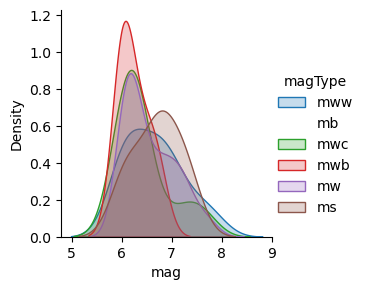

In [31]:
(sns
 .FacetGrid(df,
              hue = "magType")
 .map(sns.kdeplot,"mag", shade = True)
 .add_legend()
);

In [31]:
df.to_csv('exported_data.csv', index=False)